In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from d2l import torch as d2l
from torchvision import transforms

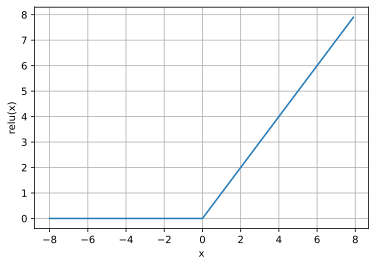

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(6, 4))

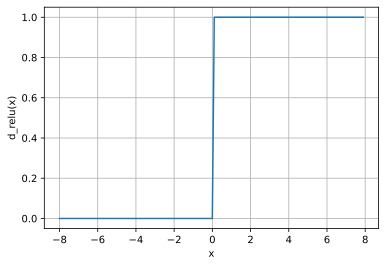

In [3]:
y.sum().backward()
d_y = x.grad
d2l.plot(x.detach(), d_y.detach(), 'x', 'd_relu(x)', figsize=(6, 4))

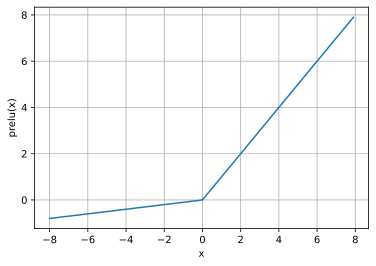

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.prelu(x, torch.tensor(0.1))
d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(6, 4))

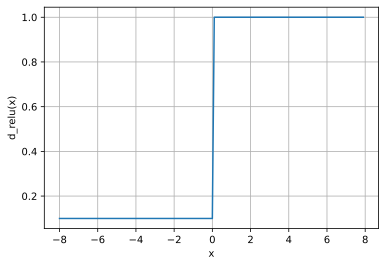

In [5]:
y.sum().backward()
d_y = x.grad
d2l.plot(x.detach(), d_y.detach(), 'x', 'd_relu(x)', figsize=(6, 4))

In [6]:
#sigmoid
x = torch.arange(-9.0, 9.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)

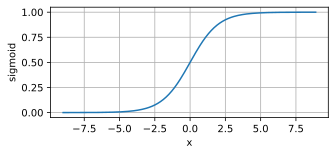

In [7]:
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid', figsize=(5, 2))

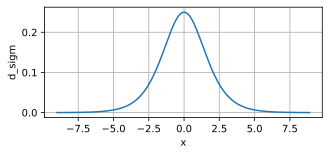

In [8]:
y.sum().backward()
d_y = x.grad
d2l.plot(x.detach(), d_y, 'x', 'd_sigm', figsize=(5, 2))

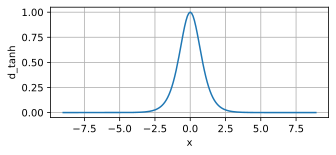

In [9]:
x.grad.zero_()
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh', figsize=(5, 2))
y.sum().backward()
d_y = x.grad
d2l.plot(x.detach(), d_y, 'x', 'd_tanh', figsize=(5, 2))

In [10]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = torch.nn.Parameter(torch.normal(0, sigma, size=(num_inputs, num_hiddens)))
        self.b1 = torch.nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = torch.nn.Parameter(torch.normal(0, sigma, size=(num_hiddens, num_outputs)))
        self.b2 = torch.nn.Parameter(torch.zeros(num_outputs))
                                     

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [12]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.01)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

In [13]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.LazyLinear(num_hiddens),
            torch.nn.LazyLinear(num_outputs)
        )

In [ ]:
model = MLP(10, 256, 0.01)
trainer.fit(model, data)

In [12]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1 : return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)
    

In [13]:
X = torch.arange(16, dtype=torch.float32).reshape(2, 8)
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  0.,  0.,  0.,  8., 10., 12., 14.],
        [16., 18., 20.,  0., 24., 26.,  0.,  0.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [14]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self,  num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.flt1 = torch.nn.Flatten()
        self.lin1 = torch.nn.LazyLinear(num_hiddens_1)
        self.lin2 = torch.nn.LazyLinear(num_hiddens_2)
        self.lin3 = torch.nn.LazyLinear(num_outputs)
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(self.flt1(X)))
        if self.train:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.train:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

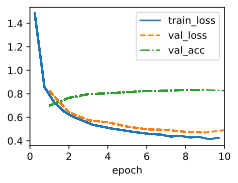

In [15]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

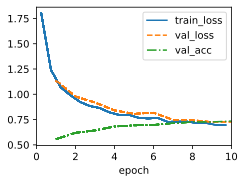

In [16]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.9, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)